# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from IPython.core.display import display, HTML, clear_output
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
import scipy
from scipy import integrate
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import sys
import os

from addict import Dict
import json

from datetime import timedelta, datetime

In [4]:
sys.path.append("../")
import plotting as my_plot
import akta

import hplc_data_processing as hplc

# mAb 4 HCCF on 90ZB
## Iteration 1

In [5]:
df, data, sample_ids, df_areas, df_norm_all, df_norm, feed_areas =\
hplc.get_data('./Akta_data/2022-09-16_Depth_filtration_90ZB_mAb_4_HCCF_2.csv', './hplc_data/2022-09-16_90ZB_HCCF/', 
              feed_name='HCCF', dil_factor=100.0, cassette=1, start_index=0, cip=False)

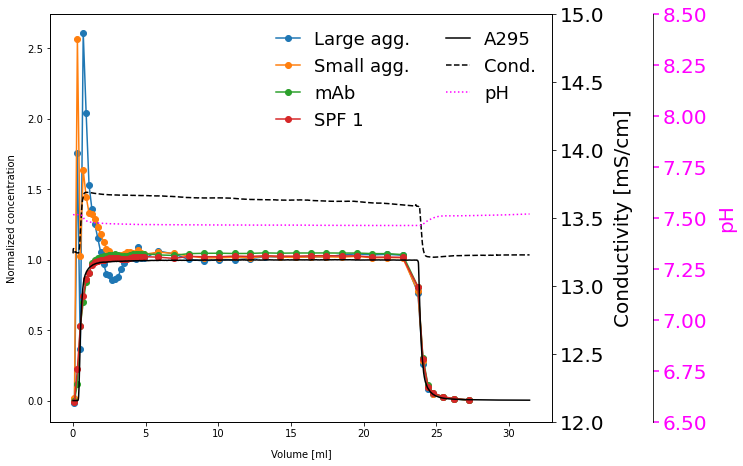

In [6]:
fig, ax, ax2, ax3, lns, labs = hplc.with_sec(df, df_norm, ypad=10)

ax2.set_ylim(12, 15)
ax3.set_ylim(6.5, 8.5)
legend = ax.legend(lns, labs, frameon=False, handlelength=1.3, ncol=2, fontsize=18)
# plt.savefig('./images/10_depth_filtration_90ZB_HCCF_1.png', dpi=300, bbox_inches='tight')

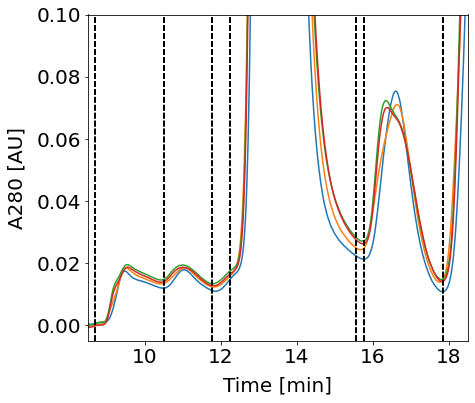

In [7]:
fig, ax = hplc.sec_chromatograms(data, sample_ids, zoomed=True, lines=True, group='hccf')

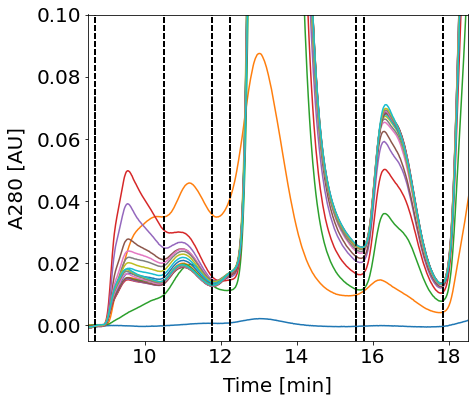

In [8]:
fig, ax = hplc.sec_chromatograms(data, sample_ids[:20], zoomed=True, lines=True, group='all')

## Iteration 2

In [9]:
df, data, sample_ids, df_areas, df_norm_all, df_norm, feed_areas =\
hplc.get_data('./Akta_data/2022-09-19_Depth_filtration_90ZB_HCCF_050.csv', './hplc_data/2022-09-19_90ZB_HCCF_050/', 
              feed_name='HCCF', dil_factor=100.0, cassette=1, start_index=0, cip=False)

In [10]:
# df_norm.to_csv('./normalized_pseudo_component_concentrations.csv', index=False)

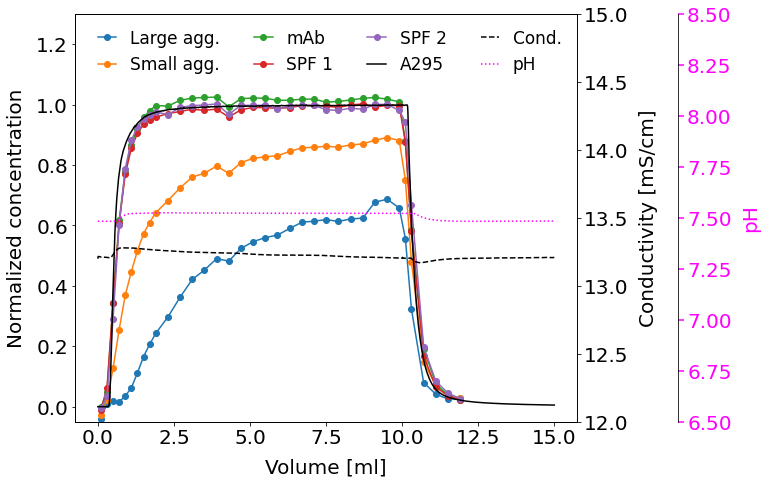

In [11]:
fig, ax, ax2, ax3, lns, labs = hplc.with_sec(df, df_norm, ypad=10, lmw2=True)
ax.set_ylim(-0.05, 1.3)
ax2.set_ylim(12, 15)
ax3.set_ylim(6.5, 8.5)

# ax.plot(df.DeltaC_pressure_ml, df.DeltaC_pressure_MPa/df.DeltaC_pressure_MPa.max(), color='cyan')

legend = ax.legend(lns, labs, frameon=False, handlelength=1.1, ncol=4, fontsize=17)
# plt.savefig('./images/10_depth_filtration_90ZB_HCCF_050_2.png', dpi=300, bbox_inches='tight')
# plt.savefig('./images/10_depth_filtration_90ZB_HCCF_050_2.tif', dpi=300, bbox_inches='tight')
# plt.savefig('./images/10_depth_filtration_90ZB_HCCF_050_2.pdf', bbox_inches='tight')

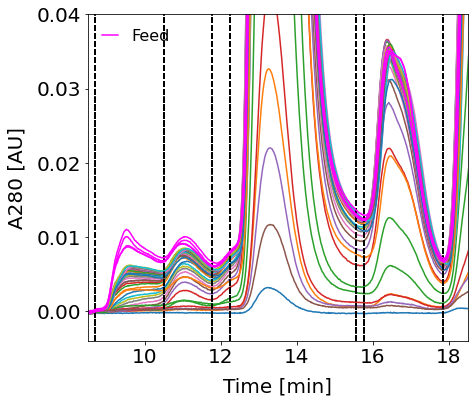

In [32]:
fig, ax = hplc.sec_chromatograms(data, sample_ids[:-4], zoomed=True, lines=True, group='all')
for i, s in enumerate(sample_ids[-4:]):
    if i == 0:
        ax.plot(data[s].df.time_min, data[s].df.uv_280, color='magenta', label='Feed')
    else:
        ax.plot(data[s].df.time_min, data[s].df.uv_280, color='magenta')

ax.set_ylim(-0.004, 0.04)
my_plot.set_layout(fig, ax, legend=True, fontsize=16, handlelength=1, loc='upper left')
plt.savefig('./images/10_depth_filtration_90ZB_HCCF_050_2_sec_chromatograms.png', dpi=300, bbox_inches='tight')

# # Unzoomed
# ax.set_ylim(-0.005, 0.65)
# ax.set_xlim(8.5, 25)

In [45]:
# fig, ax = my_plot.instantiate_fig(x=9, y=8, xlabel='Volume [ml]', ylabel='Scaled normalized conc.')

# ln_1 = ax.plot(df_norm.volume_midpoint_ml, df_norm.large_280 * 1.6, 'o-', label='Large agg. * 1.6')
# ln_2 = ax.plot(df_norm.volume_midpoint_ml, df_norm.small_280 * 1.15, 'o-', label='Small agg. * 1.15')
# ln_3 = ax.plot(df_norm.volume_midpoint_ml, df_norm.mab_254, 'o-', label='mAb')
# ln_4 = ax.plot(df_norm.volume_midpoint_ml, df_norm.lmw1_280, 'o-', label='LMW 1')

# uv_295_norm = df.uv_295_mAU.max()
# ln_7 = ax.plot(df.uv_295_ml, df.uv_295_mAU/uv_295_norm, 'k', label='A295')

# ax2 = my_plot.get_twinx(ax, ylabel='Conductivity [mS/cm]')
# ln_8 = ax2.plot(df.Cond_ml, df.Cond_mS_cm, 'k--', label='Cond.')

# ax3 = ax.twinx()
# ax3.spines["right"].set_position(("axes", 1.2))
# ax3.set_ylabel('pH')
# ln9 = ax3.plot(df.pH_ml, df.pH_pH, linestyle=':', color='magenta', label='pH')
# ax3.yaxis.label.set_color('magenta')
# tkw = dict(size=6, width=1.5)
# ax3.tick_params(axis='y', colors='magenta', **tkw)
    
# lns = ln_1 + ln_2 + ln_3 + ln_4 + ln_7 + ln_8 + ln9
# labs = [l.get_label() for l in lns]

# ax.set_ylim(-0.05, 1.3)
# ax2.set_ylim(12, 15)
# ax3.set_ylim(6.5, 8.5)

# legend = ax.legend(lns, labs, frameon=False, handlelength=1.1, ncol=4, fontsize=16)
# plt.savefig('./images/10_depth_filtration_90ZB_HCCF_050_2_rescaled.png', dpi=300, bbox_inches='tight')